In [55]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn  as sns 

Import the dataset

In [56]:
data = pd.read_excel(r'C:\Users\radek\IronHack\IronRadek\Week5\Project5\Group 1_HR Analytics_ Job Change of Data Scientists\HR_Data.xlsx')

Looking at what is in the dataset

In [57]:
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72


In [58]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                 object
company_size               object
company_type               object
last_new_job               object
training_hours              int64
dtype: object

In [59]:
'''
We see that we have mainly categorical data, but some of these columns can be changed to numerical after cleaning for example experience, last_new_job
'''

'\nWe see that we have mainly categorical data, but some of these columns can be changed to numerical after cleaning for example experience, last_new_job\n'

In [60]:
data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

In [61]:
data.shape

(2129, 13)

In [62]:
'''
We have a lot of missing values, but we can replace them by 'Non_defined' in the cleaning process 
'''

"\nWe have a lot of missing values, but we can replace them by 'Non_defined' in the cleaning process \n"

In [63]:
data.describe()

,enrollee_id,city_development_index,training_hours
count,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,64.983091
std,9576.846029,0.125074,60.238660
min,3.000000,0.448000,1.000000
25%,8562.000000,0.698000,23.000000
50%,16816.000000,0.903000,47.000000
75%,25129.000000,0.920000,86.000000
max,33353.000000,0.949000,334.000000


## DATA CLEANING

We will check all the columns and see if there is anything to clean 

### City column

In [64]:
data['city'].value_counts()

city_103    473
city_21     318
city_16     168
city_114    155
city_160    113
           ... 
city_179      1
city_39       1
city_139      1
city_31       1
city_78       1
Name: city, Length: 108, dtype: int64

In [65]:
'''
This one looks ok
'''

'\nThis one looks ok\n'

### City development index

In [66]:
data['city_development_index'].value_counts()

0.920    586
0.624    318
0.910    168
0.926    155
0.698     87
        ... 
0.693      1
0.518      1
0.493      1
0.898      1
0.865      1
Name: city_development_index, Length: 81, dtype: int64

In [67]:
data['city_development_index'].isnull().sum()

0

In [68]:
'''
This column also looks ok
'''

'\nThis column also looks ok\n'

### Experience

In [69]:
#We are replacing experience less than a year by 0
data['experience']=data['experience'].str.replace('<1','0')

In [70]:
#We are replacing experience more than 20 by 21
data['experience']=data['experience'].str.replace('>20','21')

In [71]:
data['experience'].value_counts()

21    383
5     163
3     154
4     145
6     130
2     128
7     116
9     113
10     96
11     86
8      82
0      74
16     68
15     59
1      56
14     55
13     54
12     52
17     36
19     29
18     26
20     19
Name: experience, dtype: int64

In [72]:
data['experience'].isnull().sum()

5

### Gender

In [73]:
data[data['gender'].isnull()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
6,21465,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,0,100-500,Pvt Ltd,1,11
13,24372,city_98,0.949,NaN,Has relevent experience,no_enrollment,Masters,STEM,4,100-500,Pvt Ltd,1,134
14,14070,city_103,0.920,NaN,No relevent experience,no_enrollment,Graduate,STEM,5,NaN,NaN,never,10
15,24914,city_21,0.624,NaN,Has relevent experience,Full time course,Graduate,STEM,13,1000-4999,Pvt Ltd,1,125
18,21514,city_21,0.624,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,NaN,Pvt Ltd,4,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,19499,city_75,0.939,NaN,No relevent experience,NaN,High School,NaN,2,NaN,NaN,never,44
2110,22744,city_24,0.698,NaN,Has relevent experience,no_enrollment,Masters,STEM,15,50-99,Pvt Ltd,>4,157
2114,6294,city_73,0.754,NaN,Has relevent experience,no_enrollment,High School,NaN,21,50-99,Pvt Ltd,2,31
2119,8905,city_70,0.698,NaN,No relevent experience,Full time course,High School,NaN,8,NaN,NaN,never,55


In [74]:
data['gender'].value_counts()

Male      1460
Female     137
Other       24
Name: gender, dtype: int64

In [75]:
#We are replacing the empty values with NOt defined
data['gender'].fillna('Not_defined',inplace=True)

In [76]:
data['gender'].value_counts()

Male           1460
Not_defined     508
Female          137
Other            24
Name: gender, dtype: int64

### Enrolled university

In [77]:
data['enrolled_university'].fillna('Not_defined',inplace=True)

In [78]:
data['enrolled_university'].isnull().sum()

0

### Education level

In [79]:
#We are replacing empty values by Not defined
data['education_level'].fillna('Not_defined',inplace=True)

In [80]:
data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

### Major discipline

In [81]:
#We are replacing empty values by Not defined
data['major_discipline'].fillna('Not_defined',inplace=True)

In [82]:
data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline            0
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

### Experience

In [83]:
data[data['experience'].isnull()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
32,22849,city_116,0.743,Not_defined,Has relevent experience,no_enrollment,Not_defined,Not_defined,NaN,50-99,Pvt Ltd,never,12
125,4417,city_103,0.920,Not_defined,No relevent experience,no_enrollment,Not_defined,Not_defined,NaN,NaN,NaN,NaN,99
203,19780,city_105,0.794,Female,Has relevent experience,no_enrollment,Masters,Not_defined,NaN,500-999,NaN,1,53
812,11963,city_61,0.913,Female,Has relevent experience,no_enrollment,Masters,Humanities,NaN,50-99,NaN,1,24
1734,25181,city_100,0.887,Not_defined,Has relevent experience,no_enrollment,Masters,STEM,NaN,10/49,Funded Startup,3,4


In [84]:
#We put 0 because he/she never worked
data.at[32,'experience']='0'

In [85]:
data[data['experience'].isnull()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
125,4417,city_103,0.920,Not_defined,No relevent experience,no_enrollment,Not_defined,Not_defined,NaN,NaN,NaN,NaN,99
203,19780,city_105,0.794,Female,Has relevent experience,no_enrollment,Masters,Not_defined,NaN,500-999,NaN,1,53
812,11963,city_61,0.913,Female,Has relevent experience,no_enrollment,Masters,Humanities,NaN,50-99,NaN,1,24
1734,25181,city_100,0.887,Not_defined,Has relevent experience,no_enrollment,Masters,STEM,NaN,10/49,Funded Startup,3,4


In [86]:
#For teh last four we replace missing experience with mean 
data['experience'].replace(np.nan, int(data['experience'].mode()),inplace=True)

In [87]:
data['experience'].value_counts()

21    383
5     163
3     154
4     145
6     130
2     128
7     116
9     113
10     96
11     86
8      82
0      75
16     68
15     59
1      56
14     55
13     54
12     52
17     36
19     29
18     26
20     19
21      4
Name: experience, dtype: int64

In [88]:
data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline            0
experience                  0
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

### Company size

In [89]:
data['company_size'].value_counts()

50-99        338
100-500      318
10000+       217
10/49        172
<10          163
1000-4999    143
500-999       88
5000-9999     68
Name: company_size, dtype: int64

In [90]:
#We are replacing / by - in order to unify values
data['company_size'].replace('/' , '-', regex=True,inplace=True)

In [91]:
data['company_size'].value_counts()

50-99        338
100-500      318
10000+       217
10-49        172
<10          163
1000-4999    143
500-999       88
5000-9999     68
Name: company_size, dtype: int64

In [92]:
#We replace empty values by not defined
data['company_size'].fillna('Not_defined',inplace=True)

In [93]:
data.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                      0
relevent_experience         0
enrolled_university         0
education_level             0
major_discipline            0
experience                  0
company_size                0
company_type              634
last_new_job               40
training_hours              0
dtype: int64

### Company size

In [94]:
data['company_type'].value_counts()

Pvt Ltd                1141
Public Sector           127
Funded Startup           97
Early Stage Startup      65
NGO                      53
Other                    12
Name: company_type, dtype: int64

In [95]:
#We fill empty values with Not deifned
data['company_type'].fillna('Not_defined',inplace=True)

In [96]:
data['company_type'].value_counts()

Pvt Ltd                1141
Not_defined             634
Public Sector           127
Funded Startup           97
Early Stage Startup      65
NGO                      53
Other                    12
Name: company_type, dtype: int64

In [97]:
data.isnull().sum()

enrollee_id                0
city                       0
city_development_index     0
gender                     0
relevent_experience        0
enrolled_university        0
education_level            0
major_discipline           0
experience                 0
company_size               0
company_type               0
last_new_job              40
training_hours             0
dtype: int64

### Last new job

In [98]:
data['last_new_job'].value_counts()

1        884
>4       353
2        342
never    258
3        133
4        119
Name: last_new_job, dtype: int64

In [99]:
#We are replacing never by 0 and more than 4 by 5
data['last_new_job']=data['last_new_job'].str.replace('never','0')
data['last_new_job']=data['last_new_job'].str.replace('>4','5')

In [100]:
data['last_new_job'].value_counts()

1    884
5    353
2    342
0    258
3    133
4    119
Name: last_new_job, dtype: int64

In [101]:
data[data['last_new_job'].isnull()]

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
29,19437,city_21,0.624,Not_defined,Has relevent experience,no_enrollment,Graduate,STEM,3,10-49,Pvt Ltd,NaN,105
53,4742,city_149,0.689,Not_defined,No relevent experience,no_enrollment,Not_defined,Not_defined,2,Not_defined,Not_defined,NaN,114
125,4417,city_103,0.920,Not_defined,No relevent experience,no_enrollment,Not_defined,Not_defined,21,Not_defined,Not_defined,NaN,99
129,24230,city_21,0.624,Not_defined,Has relevent experience,Full time course,Masters,No Major,0,<10,Early Stage Startup,NaN,17
149,20948,city_44,0.725,Not_defined,Has relevent experience,no_enrollment,Masters,STEM,5,10-49,Not_defined,NaN,42
178,5391,city_155,0.556,Male,No relevent experience,Full time course,Graduate,STEM,2,Not_defined,Not_defined,NaN,29
215,23969,city_30,0.698,Male,Has relevent experience,no_enrollment,Not_defined,Not_defined,21,<10,Pvt Ltd,NaN,67
225,12361,city_21,0.624,Not_defined,No relevent experience,Full time course,Graduate,STEM,0,<10,Early Stage Startup,NaN,23
226,15165,city_160,0.920,Not_defined,No relevent experience,Part time course,Graduate,STEM,21,Not_defined,Not_defined,NaN,16
289,12391,city_99,0.915,Not_defined,No relevent experience,Full time course,High School,Not_defined,3,Not_defined,Not_defined,NaN,23


In [102]:
#We are filling empty values with the mode so value of 1
data['last_new_job']=data['last_new_job'].fillna('1')

In [103]:
data['last_new_job'].value_counts()

1    924
5    353
2    342
0    258
3    133
4    119
Name: last_new_job, dtype: int64

In [104]:
#Now we have no missing avlues and clean data ready for analysis
data.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [105]:
data.to_csv(r'C:\Users\radek\IronHack\IronRadek\Week5\Project5\clean.csv')


## EDA

In [124]:
data = data.astype({"last_new_job": int, 'experience': int}, errors='raise') 

data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                  int32
company_size               object
company_type               object
last_new_job                int32
training_hours              int64
dtype: object

In [125]:
data.describe()

,enrollee_id,city_development_index,experience,last_new_job,training_hours
count,2129.000000,2129.000000,2129.000000,2129.000000,2129.000000
mean,16861.614843,0.824984,10.120714,1.995303,64.983091
std,9576.846029,0.125074,6.878715,1.642646,60.238660
min,3.000000,0.448000,0.000000,0.000000,1.000000
25%,8562.000000,0.698000,4.000000,1.000000,23.000000
50%,16816.000000,0.903000,9.000000,1.000000,47.000000
75%,25129.000000,0.920000,16.000000,3.000000,86.000000
max,33353.000000,0.949000,21.000000,5.000000,334.000000


In [126]:
data.dtypes

enrollee_id                 int64
city                       object
city_development_index    float64
gender                     object
relevent_experience        object
enrolled_university        object
education_level            object
major_discipline           object
experience                  int32
company_size               object
company_type               object
last_new_job                int32
training_hours              int64
dtype: object

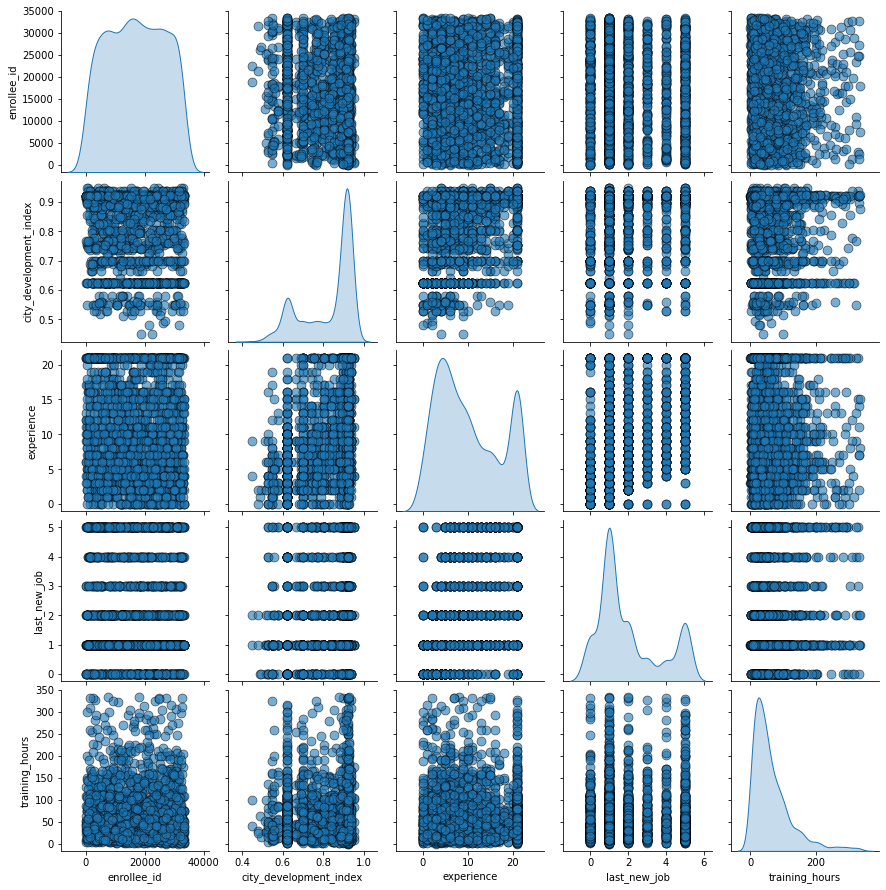

In [127]:
import seaborn as sns
sns.pairplot(data, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

In [128]:
data.corr()

,enrollee_id,city_development_index,experience,last_new_job,training_hours
enrollee_id,1.000000,-0.045087,-0.020093,-0.043975,0.003239
city_development_index,-0.045087,1.000000,0.402067,0.231499,-0.022653
experience,-0.020093,0.402067,1.000000,0.475577,0.009145
last_new_job,-0.043975,0.231499,0.475577,1.000000,0.018145
training_hours,0.003239,-0.022653,0.009145,0.018145,1.000000
